In [1]:
import sub.db_pandas as dpa
import subs.QUEST as qu
import pandas as pd
import sub.analysis as an
import numpy as np
import matplotlib.pyplot as plt

In [2]:
database = 'plasma2023'
table = 'data0402'

In [3]:
data1 = ['time','cur_pf_pf17t12','cur_pf_pf26t36','bz_val_ozm400','bz_val_oz000','bz_val_ozp400','bz_val_czp800','bz_val_czp400','bz_val_cz000','bz_val_czm400','bz_val_czm800','cur_ip_ip']
dbtable = dpa.Df(database, table)
df1 = dbtable.select_df(data1,'conf_div=%s AND iter < %s AND pts_r_rmin<=%s', [0, 100, 0.205])

In [4]:
database = 'plasma2023'
table = 'data0403'

In [5]:
data2 = ['time','cur_pf_pf17t12','cur_pf_pf26t36','bz_val_ozm400','bz_val_oz000','bz_val_ozp400','bz_val_czp800','bz_val_czp400','bz_val_cz000','bz_val_czm400','bz_val_czm800','cur_ip_ip']
dbtable = dpa.Df(database, table)
df2 = dbtable.select_df(data2, 'conf_div=%s AND iter < %s AND pts_r_rmin<=%s', [0, 100, 0.205])

In [6]:
database = 'plasma2023'
table = 'data0404'

In [7]:
data3 = ['time','cur_pf_pf17t12','cur_pf_pf26t36','bz_val_ozm400','bz_val_oz000','bz_val_ozp400','bz_val_czp800','bz_val_czp400','bz_val_cz000','bz_val_czm400','bz_val_czm800','cur_ip_ip']
dbtable = dpa.Df(database, table)
df3 = dbtable.select_df(data3, '%s <= time', [3.7265])

In [8]:
df0 = pd.concat([df1, df2, df3])

In [9]:
df0

time  cur_pf_pf17t12  cur_pf_pf26t36  bz_val_ozm400  bz_val_oz000  \
0       0.099250        1.016900        -1.40247       0.000006     -0.000003   
1       0.099754        0.937509        -2.90465      -0.000002     -0.000012   
2       0.100004        0.815358        -4.12358      -0.000009     -0.000017   
3       0.100250        0.777136        -5.17479      -0.000009     -0.000017   
4       0.100501        0.760378        -4.10036      -0.000009     -0.000018   
...          ...             ...             ...            ...           ...   
14225  23.252500       -1.436520         8.43546       0.000107      0.000186   
14226  23.277500       -1.590600         9.65029       0.000107      0.000184   
14227  23.302500       -1.374880         8.50995       0.000105      0.000179   
14228  23.327500       -1.684710        12.21970       0.000115      0.000188   
14229  23.352500       -1.385900         7.57515       0.000104      0.000183   

       bz_val_ozp400  bz_val_czp800  bz_val_czp400  bz_val_cz000  \
0           0.000006      -0.000009       0.000016      0.000041   
1          -0.000002      -0.000033       0.000004      0.000038   
2          -0.000009      -0.000063      -0.000032     -0.000003   
3          -0.000009      -0.000063      -0.000032     -0.000003   
4          -0.000009      -0.000063      -0.000032     -0.000003   
...              ...            ...            ...           ...   
14225       0.000107      -0.000462      -0.001338     -0.002148   
14226       0.000107      -0.000432      -0.001306     -0.002106   
14227       0.000105      -0.000451      -0.001341     -0.002181   
14228       0.000115      -0.000396      -0.001307     -0.002116   
14229       0.000104      -0.000476      -0.001348     -0.002168   

       bz_val_czm400  bz_val_czm800  cur_ip_ip  
0           0.000016      -0.000009    52.1672  
1           0.000004      -0.000033    74.5237  
2          -0.000032      -0.000063    52.1672  
3          -0.000032      -0.000063    33.5360  
4          -0.000032      -0.000063    52.1672  
...              ...            ...        ...  
14225      -0.001338      -0.000462 -2452.3600  
14226      -0.001306      -0.000432 -2422.5200  
14227      -0.001341      -0.000451 -2448.5800  
14228      -0.001307      -0.000396 -2474.7100  
14229      -0.001348      -0.000476 -2448.6700  

[23352 rows x 12 columns]

decdaqから読み込み

In [10]:
#換算係数
pf17cz8 = 0.0067579231215604664e+4#G/kA
pf17cz4 = 0.007826195334585322e+4
pf17cz0 = 0.008171716583792687e+4

pf26cz8 = 0.01951789751848346e+4
pf26cz4 = 0.016786434513453928e+4
pf26cz0 = 0.015386161969249744e+4

center = 1.3e-3 #V/G
outer = 9e-3


In [11]:
size = qu.readDecDaq01(27207, 1000)

In [12]:
time = size[0][1:23352]
ch4 = (size[1][4][1:23352]-np.mean(size[1][4][25000:26000]))/outer #ozm400
ch7 = (size[1][7][1:23352]-np.mean(size[1][7][25000:26000]))/outer #oz000
ch10 = (size[1][10][1:23352]-np.mean(size[1][10][25000:26000]))/outer #ozp400
ch16 = (size[1][16][1:23352]-np.mean(size[1][16][25000:26000]))/center #czp800
ch17 = (size[1][17][1:23352]-np.mean(size[1][17][25000:26000]))/center #czp400
ch18 = (size[1][18][1:23352]-np.mean(size[1][18][25000:26000]))/center #cz000
ch19 = -(size[1][19][1:23352]-np.mean(size[1][19][25000:26000]))/center #czm400
ch20 = -(size[1][20][1:23352]-np.mean(size[1][20][25000:26000]))/center #czm800

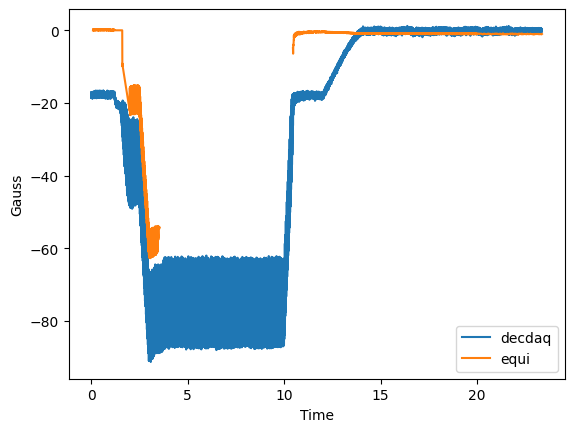

In [13]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, ch4, label = "decdaq")
plt.plot(df0['time'], df0['bz_val_ozm400'] * -10e+3, label = 'equi')
plt.ylabel('Gauss')
plt.legend()
plt.show()

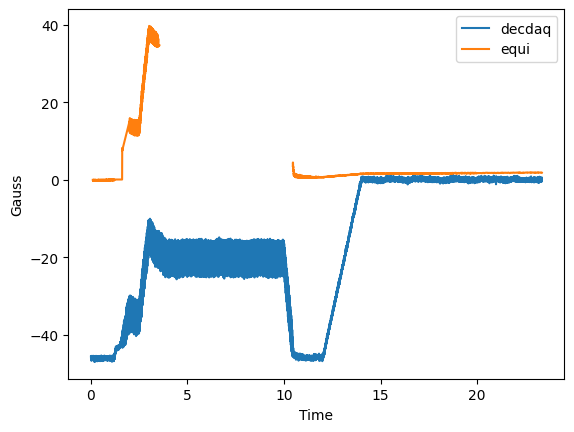

In [14]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, ch7, label = "decdaq")
plt.plot(df0['time'], df0['bz_val_oz000'] * 10e+3, label = 'equi')
plt.ylabel('Gauss')
plt.legend()
plt.show()

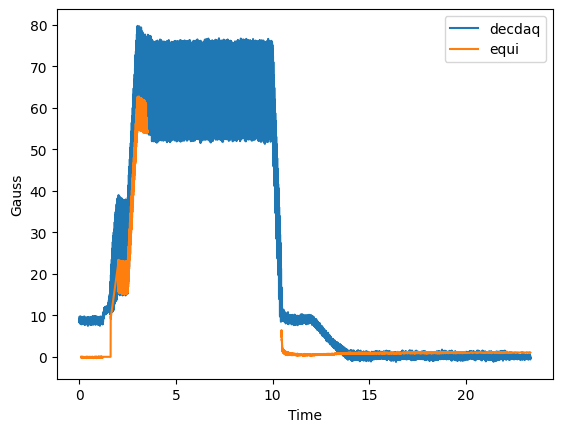

In [15]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, ch10, label = "decdaq")
plt.plot(df0['time'], df0['bz_val_ozp400'] * 10e+3, label = 'equi')
plt.ylabel('Gauss')
plt.legend()
plt.show()

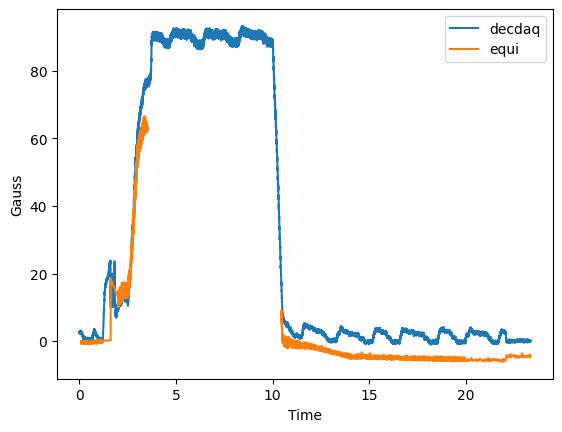

In [16]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, ch16, label = "decdaq")
plt.plot(df0['time'], df0['bz_val_czp800'] * 10e+3, label = 'equi')
plt.ylabel('Gauss')
plt.legend()
plt.show()

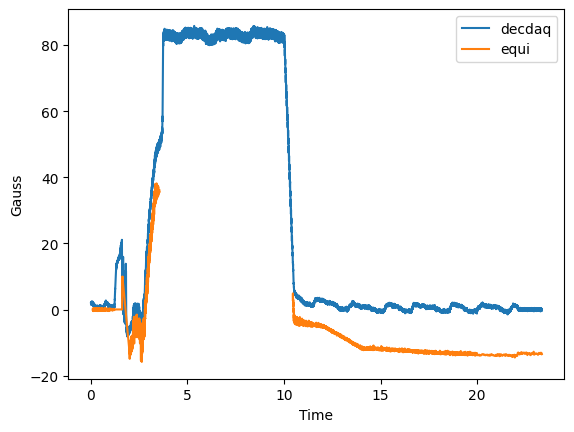

In [17]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, ch17, label = "decdaq")
plt.plot(df0['time'], df0['bz_val_czp400'] * 10e+3, label = 'equi')
plt.ylabel('Gauss')
plt.legend()
plt.show()

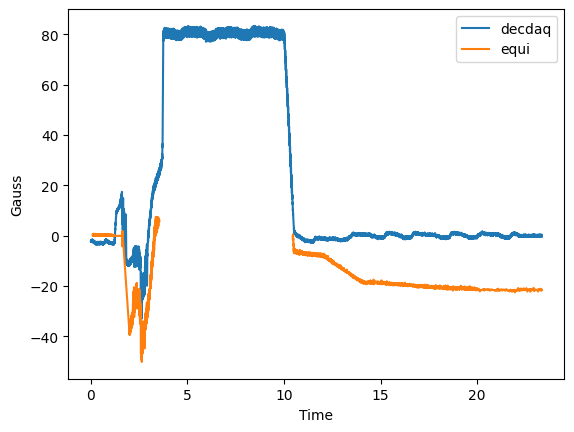

In [18]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, ch18, label = "decdaq")
plt.plot(df0['time'], df0['bz_val_cz000'] * 10e+3, label = 'equi')
plt.ylabel('Gauss')
plt.legend()
plt.show()

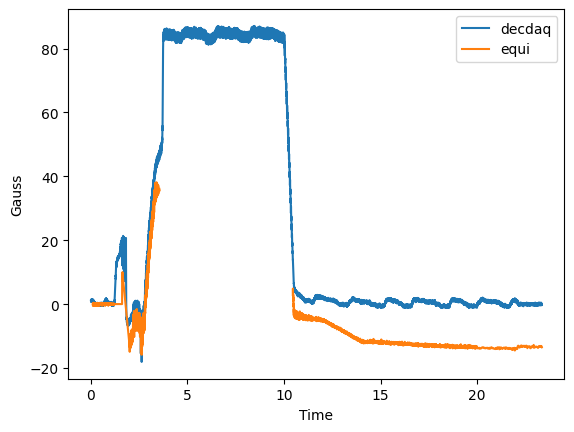

In [19]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, ch19, label = "decdaq")
plt.plot(df0['time'], df0['bz_val_czm400'] * 10e+3, label = 'equi')
plt.ylabel('Gauss')
plt.legend()
plt.show()

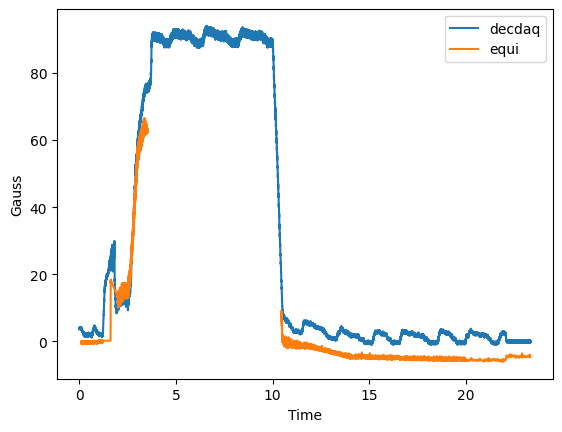

In [20]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, ch20, label = "decdaq")
plt.plot(df0['time'], df0['bz_val_czm800'] * 10e+3, label = 'equi')
plt.ylabel('Gauss')
plt.legend()
plt.show()